In [1]:
import cv2
import matplotlib.pyplot as plt
from utils.ImageProcess.ImageProcess import cv2Bgr2Rgb,normalizeStaining,readMatFile
import matplotlib.pyplot as plt
from utils.ImageProcess.ImgShow import showLineImg
import scipy.io as scio
import os
import numpy as np

In [30]:
'''
开始数据转换
如何进行数据转换，需要知道的是，
训练的图片数据是(3,1000,1000)
label数据是(1000,1000)
bound数据是(1000,1000)
'''
# 将所有的文件转换成npy文件
# 所有的文件转化为需要的个格式
# 这边保存的是原图
trainPathInit = './train/Images'
testSameInit = './test_same/Images'
testDiffInit = './test_diff/Images'
# 这边是生成的图片的路径
trainSavePath = './kumarDataset/train/trainDataSet.npy'
testSaveSame = './kumarDataset/train/testSameDataSet.npy'
testSaveDiff = './kumarDataset/train/testDiffDataSet.npy'

def readImg(initPath,savePath):
    imgList = []
    for image in sorted(os.listdir(initPath)):
        imagePath = initPath+'/'+image
        img = cv2Bgr2Rgb(imagePath)
        imgNor,_,_ = normalizeStaining(img)
        imgList.append(imgNor)
    imgArray = np.array(imgList)
    np.save(savePath,imgArray)

# readImg(trainPathInit,trainSavePath)
# readImg(testSameInit,testSaveSame)
readImg(testDiffInit,testSaveDiff)
dataset = np.load(testSaveDiff)
print(dataset.shape)



(6, 1000, 1000, 3)


In [8]:
# 对label文件进行处理
labelInit = './train/Labels'
labelSamelInit = './test_same/Labels'
labelDiffInit = './test_diff/Labels'

labelSaveInit = './kumarDataset/labels/labelDataSet.npy'
labelSaveSamelInit = './kumarDataset/labels/labelSameDataSet.npy'
labelSaveDiffInit = './kumarDataset/labels/labelDiffDataSet.npy'

def readLabel(initPath,savePath):
    labelList = []
    for label in sorted(os.listdir(initPath)):
        path = initPath+'/'+label
        labelImg = readMatFile(path)
        # print(labelImg.shape)
        labelList.append(labelImg)
    laeblArray = np.array(labelList)
    np.save(savePath,laeblArray)

# readLabel(labelInit,labelSaveInit)
readLabel(labelDiffInit,labelSaveDiffInit)
dataset = np.load(labelSaveDiffInit)
print(dataset.shape)



(6, 1000, 1000)


In [26]:
# 对bounds文件进行处理
boundInit = './train/Overlay'
boundSameInit = './test_same/Overlay'
boundDiffInit = './test_diff/Overlay'

boundSaveInit = './kumarDataset/bounds/boundDataSet.npy'
boundSaveSameInit = './kumarDataset/bounds/boundSameDataSet.npy'
boundSaveDiffInit = './kumarDataset/bounds/boundDiffDataSet.npy'

def readBound(initPath,savePath):
    boundList = []
    for bound in sorted(os.listdir(initPath)):
        boundPath = initPath+'/'+bound
        image = cv2Bgr2Rgb(boundPath)
        # 对image进行处理
        for h in range(image.shape[0]):
            for w in range(image.shape[1]):
                pixel = image[h][w]
                # 边界的标记上面必然有一个通道是0
                if pixel[0]!= 0 and pixel[1]!= 0 and pixel[2]!= 0:
                    image[h][w] = [0,0,0]
                else:
                    image[h][w] = [255,255,255]
        singleChannel = image[:,:,0] # 返回的数据还是（1000,1000）格式的数据
        boundList.append(singleChannel)
        boundArray = np.array(boundList)
        np.save(savePath,boundArray)
# 
# readBound(boundInit,boundSaveInit)
readBound(boundDiffInit,boundSaveDiffInit)
dataset = np.load(boundSaveDiffInit)
print(dataset.shape)


(6, 1000, 1000)


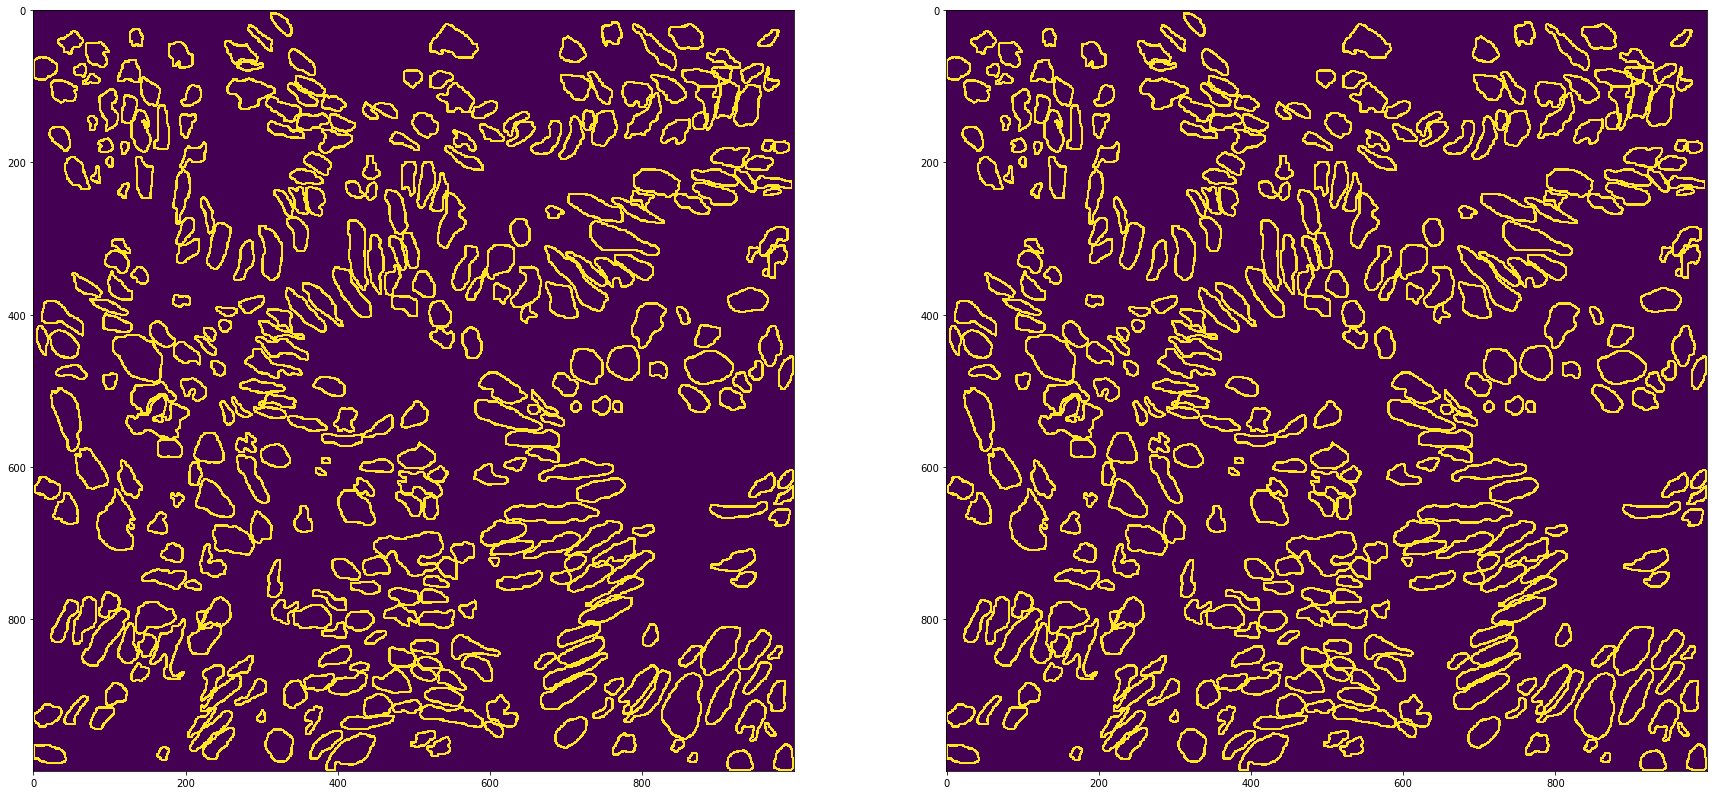

In [27]:
# 测试文件的操作
# Dataset/kumar/kumarDataset/bounds/boundSameDataSet.npy
# Dataset/kumar/kumarDataset/bounds/boundDiffDataSet.npy
bounds = np.load('./kumarDataset/bounds/boundDiffDataSet.npy')
boundImg = bounds[0]
showLineImg([boundImg,boundImg],figsize=(30,30))